<img src="/static/base/images/logo.png?v=641991992878ee24c6f3826e81054a0f" alt="Jupyter Notebook">
<h1 style="text-align: center">Notebook 4 - Analysis of ACLED data set</h1>

<h3>Prerequisites</h3>

- You must have Python 3 installed on your system (<a href="https://www.python.org/downloads/">Download</a>)
- You must have Jupyter installed on your system (<a href="https://jupyter.org/install">Download</a>)
- You must have the matplotlib librarty installed on your system (<a href="https://matplotlib.org/users/installing.html">Download</a>)
- Some knowledge of Python may be required

<h3>Explanation of Notebook 4</h3>

In this notebook, you wil carry out a number of analysis on an ACLED (Armed Conflict Location and Event Data Project) data set. (<a href=<br>
This analysis can be done by either Python or R, or both, however for this, we will use Python since it is easier.

You will have the data of four continents; Africa, Asia, Europe, and Middle East.<br>
They are all updated as of 6th of July, 2019.

The data was initially in xlsx (Excel) format but was converted to csv format.

The analysis must carry out with charts showing the following:
+ Conflicts per country over time
+ Typical lengths of conflict in a country or across the continent
+ Correlations weather data (mean temperature and rainfall)

You can analyse all four continents, starting from Africa; once one of the continents is analysed, the rest will be very similar.

<h3>Getting Started</h3>

We must first make sure that the kernel is set to Python as only then will the Python code run.

After the kernel is set to Python, try run the following cell.

In [19]:
import csv #Import the csv package

with open('data/Africa_1997-2019_Jul06.csv', 'r') as csv_file: #Open the csv file and assign it to a variable ('csv_file')
    csv_reader = csv.reader(csv_file) #Read the file using the .reader function of csv package to 'csv_reader'
        
    csvList = list(csv_reader) #Convert to a list
    csvList.remove(csvList[0]) #This is used to remove the headers to reduce issues with parsing

This will import the African continent's ACLED data and convert it to a list which we can now use to analyse.

You can access each row using its index, but using that index, you can also access each attribute/column by their indexes as well; an example is shown below.

In [ ]:
csvList[0][3]

This should print out "01-January-1997", because it is the value of the fourth column on the first row, meaning that this is the event date for the first event.

The first task is to view the conflicts per country in the continent over time; if you look at the csv file manually, you'd see that the countries are in the 17th column (<code>COUNTRY</code>), meaning that it is the 16th index, and since it has to be over a period of time, we will also get the year column (<code>YEAR</code>) which is the 5th column, making it index 4. This will involve another thing; the conflicts, but for this we won't require the type of conflict, we simply want the number of conflicts.

+ <code>COUNTRY</code> - Index 16
+ <code>YEAR</code> - Index 4

The best way to visualise this is to have a line graph for each respective country with their conflicts over the years,
and to do this, there's two things we must do; gather all countries as well as the number of conflicts for each year.

This will require a lot of thinking and effort and so it is easy to get lost, and so all of it is completed in the cell below.

In [22]:
import matplotlib.pyplot as plt

def conflictYears():
    years = [] #To store the years
    counts = [] #To store the conflict count
    countries = [] #To store all countries

    count = 0 #Initial counter

    everything = {} #To store everything together

    for i, row in enumerate(csvList): #Enumerate through the list (Enables you to use index easily)
        country = row[16] #Store the country
        year = row[4] #Store the year

        if ((country in countries) == False): #If the country isn't previously entered
            countries.append(country) #Add the country to the list
            years = [] #Empty the years to reset to not clash with previous country
            counts = [] #Empty the counts to reset to not clash with previous country

        else: #If the country is entered (To allow multiple conflicts to be added)
            if ((year in years) == False): #If the year isn't added
                years.append(year) #Add the year

                if (count > 0): #If the count is above 0 (Done to prevent adding a 0 for the first element)
                    counts.append(count) #Add the current count (This is attached to the previous year)
                count = 0 #Reset the count to use for the next or the currently added year
                count += 1 #Increment the count (First row of the year)

            else: #If the year is added
                count += 1 #Increment the count (Second row and onwards of the year)
                if (i+1 == len(csvList)): #If it's the last row of the list (To prevent it not adding the final year)
                    counts.append(count) #Add the count of the current year

        dictionary = dict(zip(years, counts)) #Make a dictionary with both the years and counts for the current country
        everything[country] = dictionary #Set the dictionary as the value for the country

The above cell will store each country with an attached list of years which has a counter for the amount of conflicts.<br>
Now we can finally make the graph to see this visualised.

Text(0.5, 1.0, 'Conflict for country [Algeria] for all years')

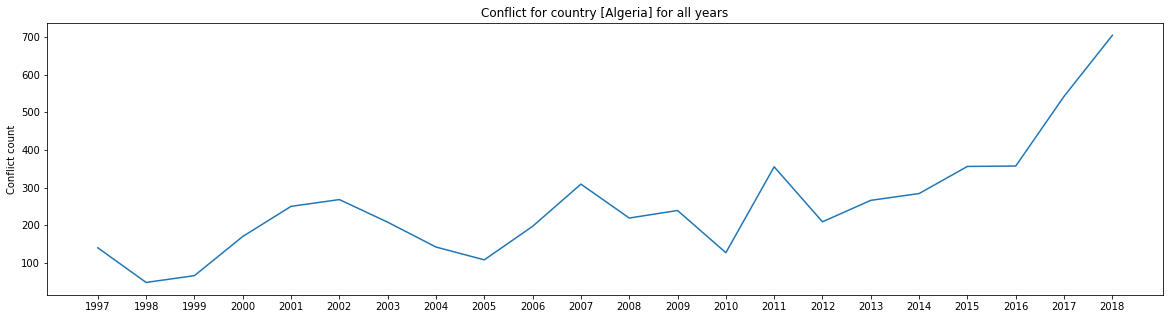

In [24]:
plt.figure(figsize=(20,5)) #Change the size of the chart to fit everything

#Change this to any country in Africa to see the results for each year    
country = "Algeria"

#Convert both to a list since dictionaries don't work with plots
plt.plot((list(everything[country].keys())), (list(everything[country].values()))) 

#Set the labels
plt.ylabel('Conflict count')
plt.title('Conflict for country ['+ country +'] for all years')

Running the above cell will generate a well constructed chart for displaying the conflict count throughout the years; one thing to note is that it may not show the latest year in some countries due to lack of data.

Try attempt this but on the Europe data set ("data/Europe_2018-2019_Jul06.csv") on the following cell.<br>
Please ensure it is also under the function named "conflictYears2" to avoid clashing.

<b>Double click for the solution</b>

<!--
import matplotlib.pyplot as plt

def conflictYears():
    years = [] #To store the years
    counts = [] #To store the conflict count
    countries = [] #To store all countries

    count = 0 #Initial counter

    everything = {} #To store everything together

    for i, row in enumerate(csvList): #Enumerate through the list (Enables you to use index easily)
        country = row[16] #Store the country
        year = row[4] #Store the year

        if ((country in countries) == False): #If the country isn't previously entered
            countries.append(country) #Add the country to the list
            years = [] #Empty the years to reset to not clash with previous country
            counts = [] #Empty the counts to reset to not clash with previous country

        else: #If the country is entered (To allow multiple conflicts to be added)
            if ((year in years) == False): #If the year isn't added
                years.append(year) #Add the year

                if (count > 0): #If the count is above 0 (Done to prevent adding a 0 for the first element)
                    counts.append(count) #Add the current count (This is attached to the previous year)
                count = 0 #Reset the count to use for the next or the currently added year
                count += 1 #Increment the count (First row of the year)

            else: #If the year is added
                count += 1 #Increment the count (Second row and onwards of the year)
                if (i+1 == len(csvList)): #If it's the last row of the list (To prevent it not adding the final year)
                    counts.append(count) #Add the count of the current year

        dictionary = dict(zip(years, counts)) #Make a dictionary with both the years and counts for the current country
        everything[country] = dictionary #Set the dictionary as the value for the country
    
plt.figure(figsize=(20,5)) #Change the size of the chart to fit everything

#Change this to any country in Africa to see the results for each year    
country = "Ukraine"

#Convert both to a list since dictionaries don't work with plots
plt.plot((list(everything[country].keys())), (list(everything[country].values()))) 

#Set the labels
plt.ylabel('Conflict count')
plt.title('Conflict for country ['+ country +'] for all years')
-->

You will notice that there's not much data and so the date range will be considerably lower.

Next up is to find the typical lengths of conflicts in a country or as a continent as a whole, the way we must do this is by getting the average length for those conflicts for either a country or a continent.

This means that it will be similar to the task above but instead of getting the amount of conflicts, we get their lengths and average them for each country before appending them; to make things easier, that cell will be used as a basis.

In [28]:
import matplotlib.pyplot as plt

def conflictLengths():
    lengths = [] #To store the conflict count
    countries = [] #To store all countries

    count = 0 #Initial counter

    everything = {} #To store everything together

    for i, row in enumerate(csvList): #Enumerate through the list (Enables you to use index easily)
        country = row[16] #Store the country

        if ((country in countries) == False): #If the country isn't previously entered
            countries.append(country) #Add the country to the list
            lengths = [] #Empty the counts to reset to not clash with previous country

        else: #If the country is entered (To allow multiple conflicts to be added)
            if (count > 0): #If the count is above 0 (Done to prevent adding a 0 for the first element)
                counts.append(count) #Add the current count (This is attached to the previous year)
            lengths = 0 #Reset the count to use for the next or the currently added year
            lengths += 1 #Increment the count (First row of the year)

        dictionary = dict(zip(years, counts)) #Make a dictionary with both the years and counts for the current country
        everything[country] = dictionary #Set the dictionary as the value for the country

Notice how much simpler it is this time, because we do not require to use years anymore and thus it makes it shorter as well as easier to manage.

Finally, we will analyse correlations in the weather data, this will be done by using the mean of the temperature and the rainfall.